In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Changing the settings options for better display

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Data Understanding and EDA

In [4]:
# Loading the given dataset
bikes = pd.read_csv('day.csv')
bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305,11.463,43.696,12.522,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378,11.660,51.826,6.001,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057,10.442,49.870,11.305,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765,8.113,53.583,17.876,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.672,5.809,43.417,24.251,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184,7.544,48.292,14.959,41,1280,1321


In [5]:
# Checking the number of rows and columns
bikes.shape

(730, 16)

In [6]:
# Checking info on the columns and missing values
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking the summary of numerical columns
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000
mean,365.500,2.499,0.500,6.526,0.029,2.996,0.690,1.395,20.319,23.726,62.765,12.764,849.249,3658.758,4508.007
std,210.877,1.110,0.500,3.450,0.167,2.000,0.463,0.545,7.507,8.150,14.238,5.196,686.480,1559.759,1936.012
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,2.424,3.953,0.000,1.500,2.000,20.000,22.000
25%,183.250,2.000,0.000,4.000,0.000,1.000,0.000,1.000,13.812,16.890,52.000,9.042,316.250,2502.250,3169.750
50%,365.500,3.000,0.500,7.000,0.000,3.000,1.000,1.000,20.466,24.368,62.625,12.125,717.000,3664.500,4548.500
75%,547.750,3.000,1.000,10.000,0.000,5.000,1.000,2.000,26.881,30.446,72.990,15.626,1096.500,4783.250,5966.000
max,730.000,4.000,1.000,12.000,1.000,6.000,1.000,3.000,35.328,42.045,97.250,34.000,3410.000,6946.000,8714.000


In [8]:
#Dropping the record index column as it won't provide any meaningful insight
bikes.drop('instant', axis=1, inplace=True)

In [9]:
# Since date column is already seperated into year, month and weekday (as numerical values), dropping that column
bikes.drop('dteday', axis=1, inplace=True)

In [10]:
# Choosing to retain atemp column (the feeling temperature of a human ) as the target variable is human specific.
# Hence dropping the temp column, as temp and atemp are very similar
bikes.drop('temp', axis=1, inplace=True)

In [11]:
# Since cnt = casual + registered , there are correlated, hence dropping casual and registered columns
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

In [12]:
# Converting season, weathersit, mnth, weekday columns to categorical variables
bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['weathersit'] = bikes['weathersit'].map({1:'clear', 2:'misty', 3:'light_rain', 4:'heavy_rain'})
bikes['mnth'] = bikes['mnth'].map({1:'january', 2:'february', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 
                                   8:'august', 9:'september', 10:'october', 11:'november', 12:'december'})
bikes['weekday'] = bikes['weekday'].map({0:'sunday', 1:'monday',2:'tuesday', 3:'wednesday', 4:'thursday',
                                        5:'friday', 6:'saturday'})

In [13]:
#Checking the dataset again
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,misty,18.181,80.583,10.750,985
1,spring,0,january,0,tuesday,1,misty,17.687,69.609,16.652,801
2,spring,0,january,0,wednesday,1,clear,9.470,43.727,16.637,1349
3,spring,0,january,0,thursday,1,clear,10.606,59.044,10.740,1562
4,spring,0,january,0,friday,1,clear,11.463,43.696,12.522,1600


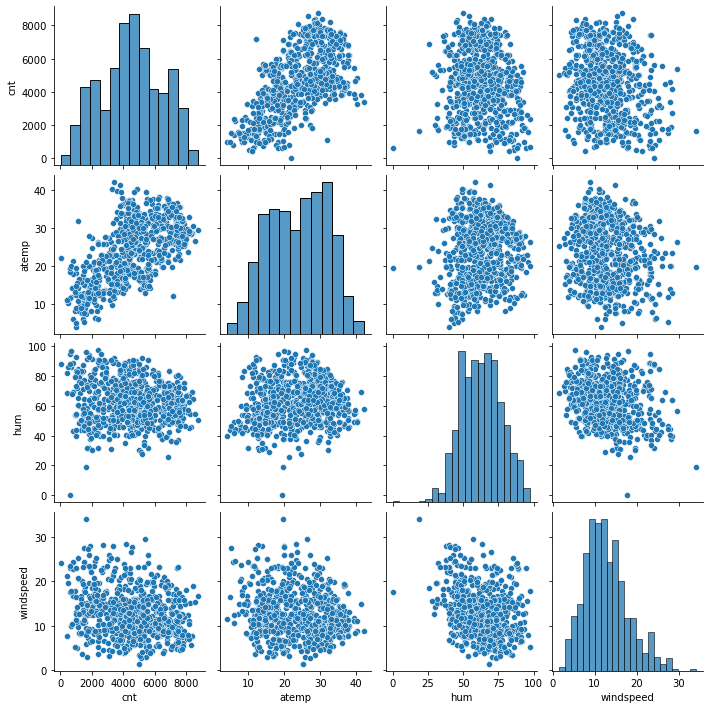

In [14]:
#Checking relationship between all numerical variables through scatter plots
sns.pairplot(bikes[['cnt', 'atemp', 'hum', 'windspeed']])
plt.show()

**`OBSERVATIONS:`**
- CNT column seems to have a positive linear relationship with ATEMP column.
- Windspeed and humidity column seems to be almost normally distributed.

<AxesSubplot:>

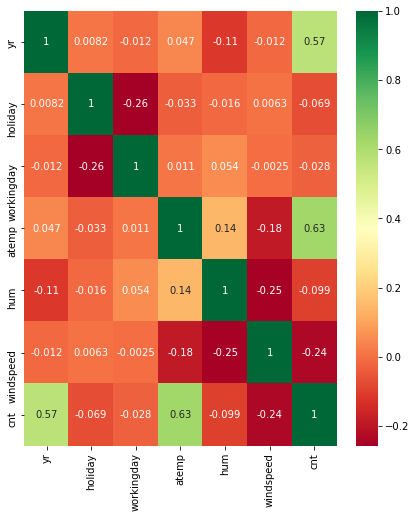

In [15]:
# Plotting heatmap to check correlation between numerical columns
plt.figure(figsize=[7,8])
sns.heatmap(bikes.corr(), annot=True,cmap='RdYlGn')

**`OBSERVATIONS:`**
- CNT column has good positive correlation with ATEMP column and YR (year) column.
- CNT column has a notable negative correlation with WINDSPEED column.
- WORKINGDAY column has a notable negative correlation with HOLIDAY column.
- WINDSPEED column has a notable negative correlation with HUM column.

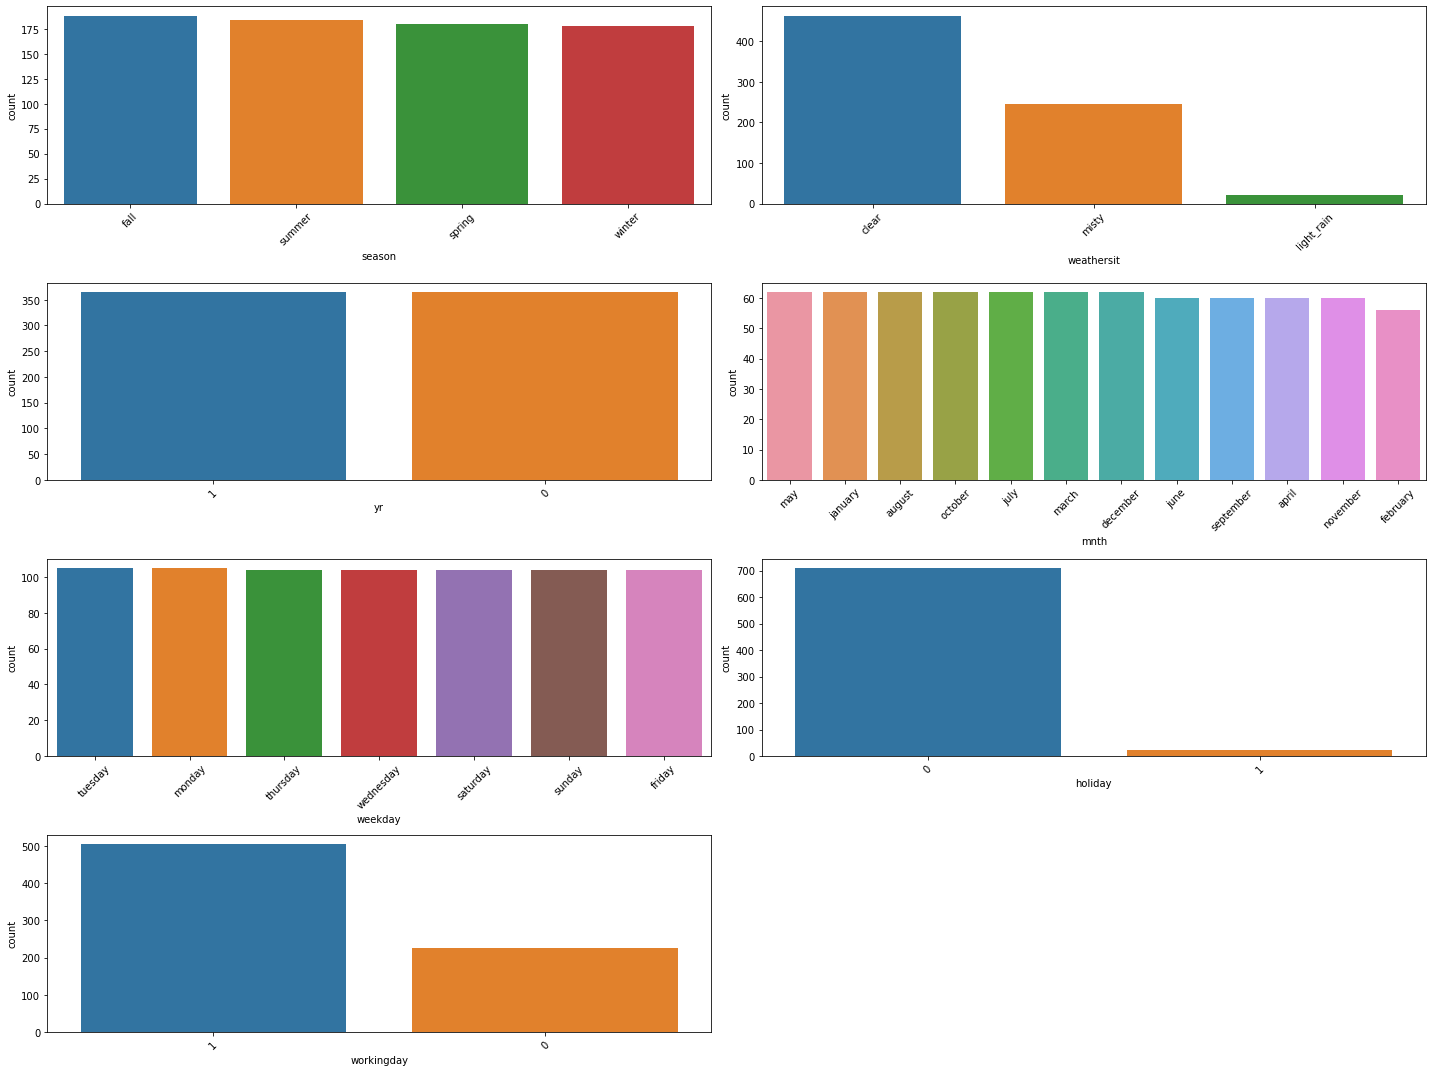

In [16]:
# Plotting the categorical variable distribution using countplot
category_cols = bikes[['season', 'weathersit', 'yr', 'mnth', 'weekday', 'holiday', 'workingday']].columns
plt.figure(figsize = [20,15])
for i in enumerate(category_cols):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(x=i[1], data=bikes, order=bikes[i[1]].value_counts().index)
    plt.xticks(rotation=45)
    plt.tight_layout()

**`OBSERVATIONS:`**
- Clear category in the Weathersit column has the highest count which is understandable as most people go on bike rides when the
    weather is clear.
- The dataset has data imbalance as there are very little records for the days on when it was a holiday. 
- Around 75% of the cycle rides have happened on working days, but the weekday distribution shows equal amount of rides on weekdays and weekends. This is could be because working day has a sum of 5 days and weekends has a sum of 2 days. 

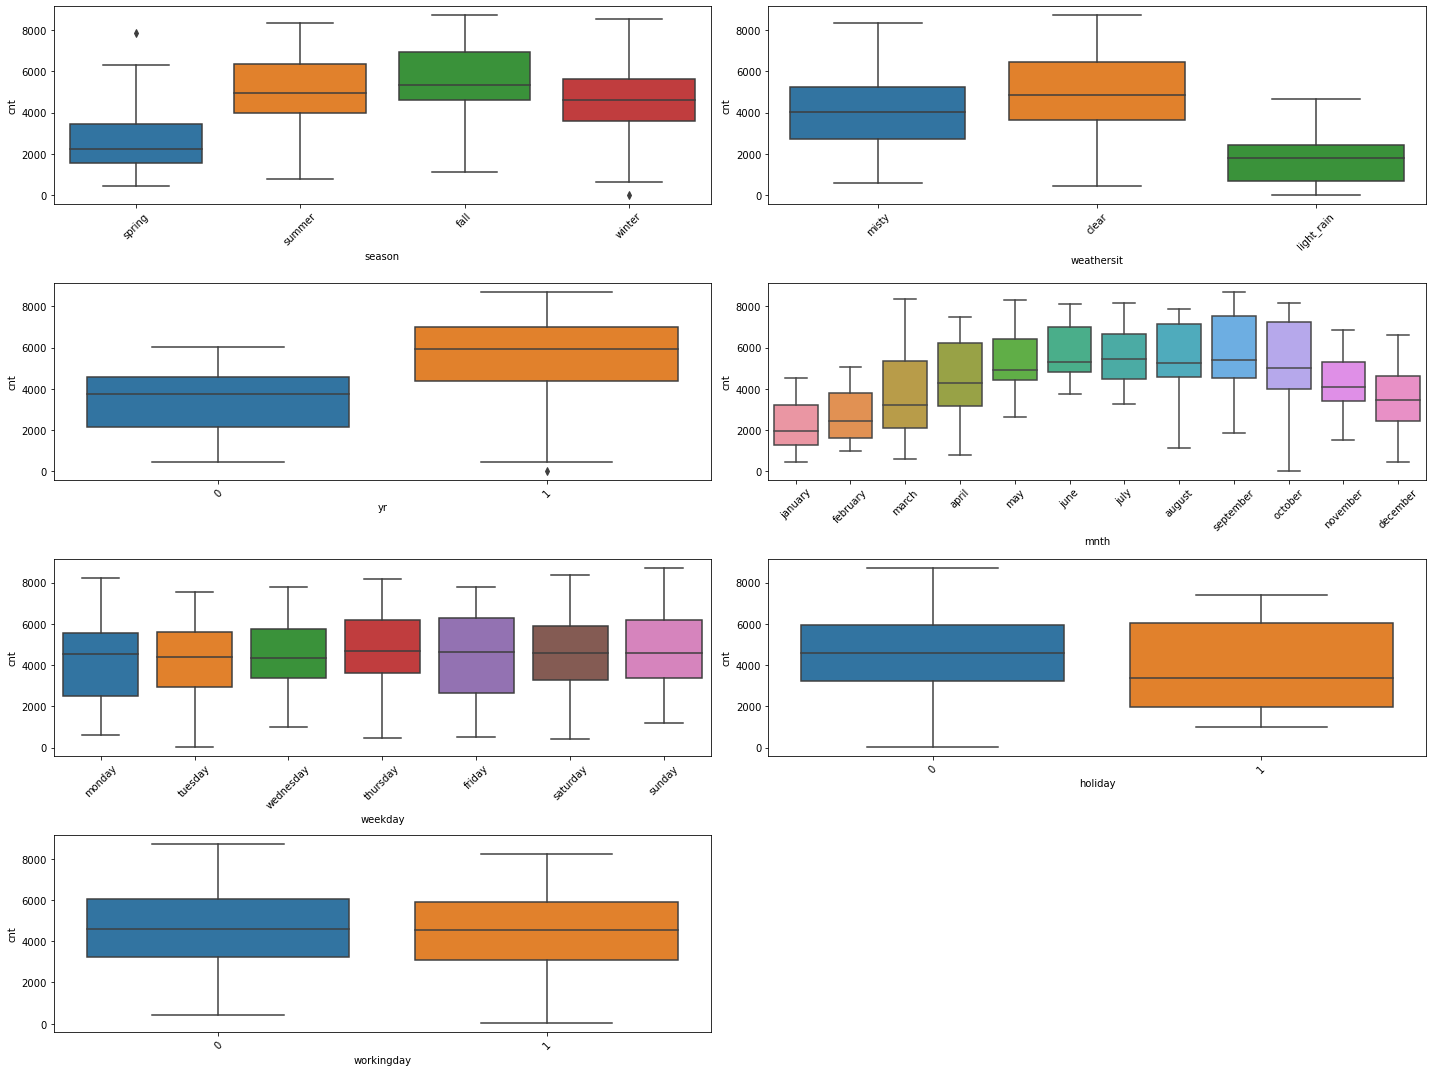

In [17]:
# Plotting the categorical variables on the basis of cnt column using boxplot
category_cols = bikes[['season', 'weathersit', 'yr', 'mnth', 'weekday', 'holiday', 'workingday']].columns
plt.figure(figsize = [20,15])
for i in enumerate(category_cols):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x=i[1], y='cnt', data=bikes)
    plt.xticks(rotation=45)
    plt.tight_layout()

**`OBSERVATIONS:`**
- Fall season has the most number of rides and spring season has the least number of rides.
- Clear weather has has most number of rides and there are no rides during heavy rains.
- More number of users has taken rides in 2019 when compared to 2018.
- From the month of May to October, the average number of rides are high. 
- There are lesser rides taken on Holidays, but this could be due to data imbalance as well.

## 2. Data Preparation for Modelling

In [18]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,misty,18.181,80.583,10.750,985
1,spring,0,january,0,tuesday,1,misty,17.687,69.609,16.652,801
2,spring,0,january,0,wednesday,1,clear,9.470,43.727,16.637,1349
3,spring,0,january,0,thursday,1,clear,10.606,59.044,10.740,1562
4,spring,0,january,0,friday,1,clear,11.463,43.696,12.522,1600


In [19]:
# Converting categorical columns into dummy variables for modelling
bikes = pd.get_dummies(data=bikes, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

In [20]:
# Checking the shape of dataset 
bikes.shape

(730, 29)

In [21]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_misty,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,0,0,1,18.181,80.583,10.750,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,17.687,69.609,16.652,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.470,43.727,16.637,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.606,59.044,10.740,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.463,43.696,12.522,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Splitting the Data into Training and Testing Sets

In [22]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [23]:
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=100)

In [24]:
print("Training dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

Training dataset shape: (510, 29)
Test dataset shape: (220, 29)


### Rescaling the Features 
- Choosing to scale using Min-Max Scaler

In [25]:
scalar = MinMaxScaler()

In [26]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_misty,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
576,1,0,1,33.145,70.417,11.083,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,20.675,62.125,10.792,4066,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,11.585,48.333,23.501,1796,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.875,48.958,8.708,4220,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,16.098,72.958,14.708,1683,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
num_cols = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[num_cols] = scalar.fit_transform(df_train[num_cols])

In [28]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_misty,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
576,1,0,1,0.766,0.726,0.265,0.828,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.439,0.640,0.255,0.465,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.200,0.498,0.663,0.204,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.392,0.505,0.188,0.483,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.319,0.752,0.381,0.191,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_misty,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000
mean,0.508,0.025,0.712,0.513,0.650,0.321,0.513,0.243,0.247,0.247,0.029,0.345,0.096,0.084,0.067,0.088,0.076,0.076,0.098,0.084,0.086,0.084,0.080,0.155,0.129,0.137,0.143,0.153,0.135
std,0.500,0.158,0.453,0.212,0.146,0.170,0.224,0.429,0.432,0.432,0.169,0.476,0.295,0.278,0.250,0.284,0.266,0.266,0.298,0.278,0.281,0.278,0.272,0.362,0.336,0.344,0.351,0.360,0.342
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.332,0.539,0.199,0.356,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,1.000,0.530,0.654,0.297,0.519,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,0.688,0.755,0.414,0.685,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## 5. Model Building

In [30]:
### Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

### 5.1  Using Automated feature selection first - RFE

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE to obtain 13 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)
rfe = rfe.fit(X_train, y_train)

In [33]:
# Checking the RFE selected features and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 7),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_light_rain', True, 1),
 ('weathersit_misty', True, 1),
 ('mnth_august', True, 1),
 ('mnth_december', False, 2),
 ('mnth_february', True, 1),
 ('mnth_january', True, 1),
 ('mnth_july', False, 13),
 ('mnth_june', False, 9),
 ('mnth_march', False, 16),
 ('mnth_may', False, 8),
 ('mnth_november', False, 3),
 ('mnth_october', False, 14),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 11),
 ('weekday_saturday', False, 5),
 ('weekday_sunday', False, 6),
 ('weekday_thursday', False, 15),
 ('weekday_tuesday', False, 10),
 ('weekday_wednesday', False, 12)]

In [34]:
# Checking the columns RFE has selected
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'weathersit_light_rain', 'weathersit_misty',
       'mnth_august', 'mnth_february', 'mnth_january', 'mnth_september'],
      dtype='object')

In [35]:
# Checking the columns RFE has rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'season_spring', 'mnth_december', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday'],
      dtype='object')

In [36]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,season_summer,season_winter,weathersit_light_rain,weathersit_misty,mnth_august,mnth_february,mnth_january,mnth_september
576,1,0,0.766,0.726,0.265,0,0,0,0,0,0,0,0
426,1,0,0.439,0.640,0.255,0,0,0,1,0,0,0,0
728,1,0,0.200,0.498,0.663,0,0,0,0,0,0,0,0
482,1,0,0.392,0.505,0.188,1,0,0,1,0,0,0,0
111,0,0,0.319,0.752,0.381,1,0,0,1,0,0,0,0


### 5.2 Using statsmodels to check the paramaters of the model built using RFE

In [37]:
# Importing necessary libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Adding a constant variable   
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
# Creating a model with RFE selected features
lm = sm.OLS(y_train,X_train_rfe).fit()

In [40]:
#Summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          8.93e-187
Time:                        20:55:19   Log-Likelihood:                 503.83
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     496   BIC:                            -920.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

**`OBSERVATIONS:`**
- R2, Adjusted R2, F-statistic and P-value of F-statistic seems to be good.
- p-value of the Month February is very high, hence proceeding to drop that column

In [41]:
# Dropping the mnth_february column
X_train_1 = X_train_rfe.drop(['mnth_february'], axis=1)

### 5.3  Fine-tuning the Model through Mannual Backward Selection

#### MODEL - 1 

In [42]:
# Rebuilding the model

X_train_1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train, X_train_1).fit()

In [43]:
#Checking new model summary
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.83e-187
Time:                        20:55:19   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     497   BIC:                            -924.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

**`OBSERVATIONS:`**
- All p-values are significant.

In [44]:
# Dropping constant before calculating VIF
X_train_1.drop(['const'], axis=1, inplace=True)

In [45]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.520
2,atemp,11.470
4,windspeed,3.600
8,weathersit_misty,2.160
0,yr,2.040
6,season_winter,2.020
5,season_summer,1.960
9,mnth_august,1.560
10,mnth_january,1.540
11,mnth_september,1.320


In [46]:
# Dropping hum column as it has a very high VIF

X_train_2 = X_train_1.drop('hum', axis=1)

#### MODEL - 2

In [47]:
# Rebuilding model and checking

X_train_2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train,X_train_2).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.60e-184
Time:                        20:55:19   Log-Likelihood:                 492.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     498   BIC:                            -909.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

**`OBSERVATIONS:`**
- All p-values are significant.

In [48]:
# Dropping constant before calculating VIF
X_train_2.drop(['const'], axis=1, inplace=True)

In [49]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.950
3,windspeed,3.270
0,yr,2.040
4,season_summer,1.910
5,season_winter,1.560
8,mnth_august,1.560
7,weathersit_misty,1.540
10,mnth_september,1.310
9,mnth_january,1.220
6,weathersit_light_rain,1.080


<AxesSubplot:>

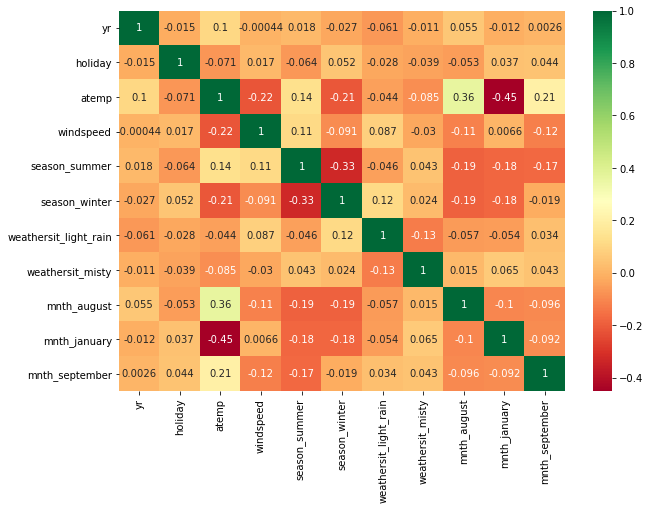

In [50]:
# Plotting heatmap t0 check correlations between the columns
plt.figure(figsize=[10,7])
sns.heatmap(X_train_2.corr(), annot=True, cmap='RdYlGn')

**`OBSERVATIONS:`**
- Since atemp column has a high negative correlation with month january, deciding to drop the month january column.
- This decision is due to atemp column having a good positive linear relationship with target variable - cnt

In [51]:
# Dropping mnth_january column as it has high negative correlation with atemp column

X_train_3 = X_train_2.drop('mnth_january', axis=1)

#### MODEL - 3

In [52]:
# Rebuilding model and checking

X_train_3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train,X_train_3).fit()

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          6.05e-184
Time:                        20:55:21   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

**`OBSERVATIONS:`**
- All the p-values are significant.

In [53]:
# Dropping constant before calculating VIF
X_train_3.drop(['const'], axis=1, inplace=True)

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.920
3,windspeed,3.050
0,yr,2.000
4,season_summer,1.830
8,mnth_august,1.550
5,season_winter,1.500
7,weathersit_misty,1.490
9,mnth_september,1.300
6,weathersit_light_rain,1.080
1,holiday,1.040


<AxesSubplot:>

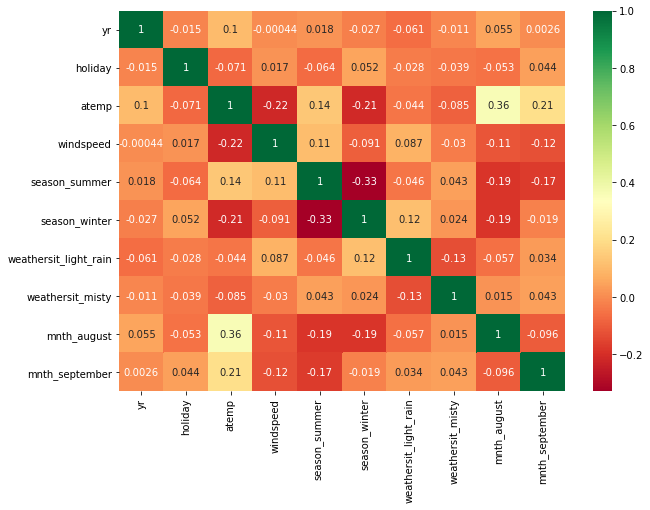

In [55]:
# Plotting heatmap to check correlations between the columns
plt.figure(figsize=[10,7])
sns.heatmap(X_train_3.corr(), annot=True, cmap='RdYlGn')

In [56]:
# Dropping mnth_august column as it has medium correlation with atemp column

X_train_4 = X_train_3.drop('mnth_august', axis=1)

#### MODEL - 4

In [57]:
# Rebuilding model and checking

X_train_4 = sm.add_constant(X_train_4)

lm_4 = sm.OLS(y_train,X_train_4).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.21e-181
Time:                        20:55:22   Log-Likelihood:                 480.36
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     500   BIC:                            -898.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

**`OBSERVATIONS:`**
- All the p-values are significant.

In [58]:
# Dropping constant before calculating VIF
X_train_check = X_train_4.drop(['const'], axis=1)

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_check
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.690
3,windspeed,3.010
0,yr,2.000
4,season_summer,1.580
7,weathersit_misty,1.480
5,season_winter,1.380
8,mnth_september,1.200
6,weathersit_light_rain,1.080
1,holiday,1.040


<AxesSubplot:>

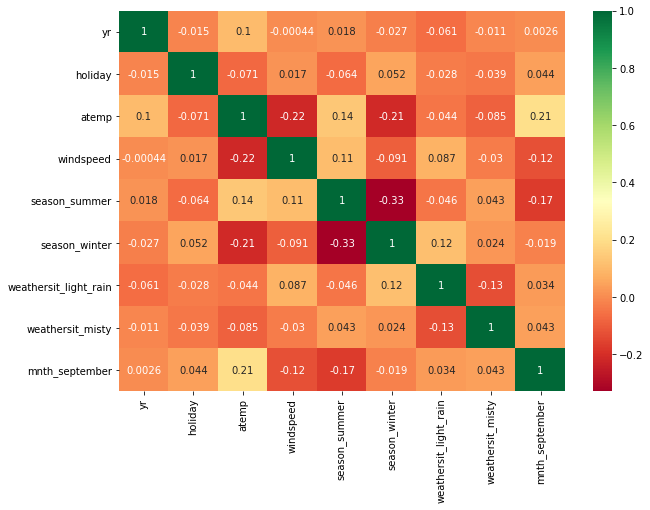

In [60]:
# Plotting heatmap t0 check correlations between the columns
plt.figure(figsize=[10,7])
sns.heatmap(X_train_check.corr(), annot=True, cmap='RdYlGn')

**`OBSERVATIONS:`**
- Model seems to be stable now with all p-values being significant, and no significant multicolinearity exists.

## 6. Residual Analysis of the train data

In [61]:
# Calculating y_pred on Train dataset
y_train_cnt = lm_4.predict(X_train_4)

In [62]:
#Calculating residuals
residual = y_train - y_train_cnt

Text(0.5, 0, 'Errors')

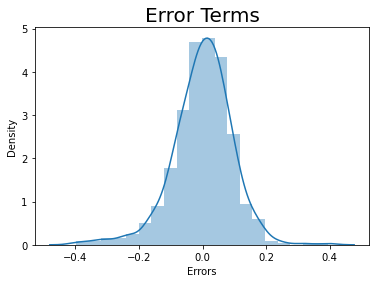

In [63]:
# Plot the histogram of the error terms
sns.distplot(residual, bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors') 

**`OBSERVATIONS:`**
- Assumption that error distribution has to be normal having mean 0 and standard distribution as 1 is verified and satisfied

Text(0, 0.5, 'Residual Count')

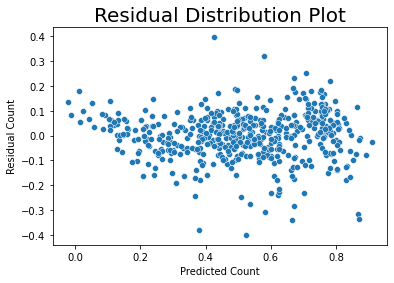

In [64]:
# Plot the Residual scatter plot to check constant variance and no pattern between error terms
sns.scatterplot(y=residual, x=y_train_cnt)
plt.title('Residual Distribution Plot', fontsize = 20) 
plt.xlabel('Predicted Count')  
plt.ylabel('Residual Count')  

**`OBSERVATIONS:`**
- Assumption that there is no relationship between the error terms and there is constant variance between the error terms is verified and satisfied

## 7. Making Predictions Using the Final Model

In [65]:
#Checking the test dataset
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_misty,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
184,0,1,0,33.271,63.792,5.459,6043,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,36.049,59.208,7.625,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,22.852,81.292,13.250,2659,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,34.249,42.417,13.417,4780,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.197,30.500,19.583,4968,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [66]:
# Applying the scaling on the test dataset's numerical variables
num_cols = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_cols] = scalar.transform(df_test[num_cols])

In [67]:
# Checking the summary of numerical columns of test dataset
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_misty,mnth_august,mnth_december,mnth_february,mnth_january,mnth_july,mnth_june,mnth_march,mnth_may,mnth_november,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
count,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000
mean,0.482,0.036,0.641,0.533,0.638,0.313,0.522,0.255,0.264,0.236,0.027,0.318,0.059,0.086,0.100,0.077,0.105,0.095,0.055,0.086,0.073,0.086,0.086,0.118,0.173,0.155,0.141,0.123,0.159
std,0.501,0.188,0.481,0.217,0.149,0.160,0.219,0.437,0.442,0.426,0.163,0.467,0.236,0.282,0.301,0.268,0.307,0.295,0.228,0.282,0.260,0.282,0.282,0.324,0.379,0.362,0.349,0.329,0.367
min,0.000,0.000,0.000,0.026,0.262,-0.043,0.048,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.345,0.529,0.199,0.379,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,1.000,0.545,0.626,0.300,0.525,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,0.713,0.744,0.403,0.678,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,0.981,1.002,0.807,0.963,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [68]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [70]:
X_train_4.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'weathersit_light_rain', 'weathersit_misty',
       'mnth_september'],
      dtype='object')

In [71]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm

X_test_final = X_test_lm[['const', 'yr', 'holiday', 'atemp', 'windspeed','season_summer','season_winter', 
                          'weathersit_light_rain', 'weathersit_misty','mnth_september']]

In [72]:
y_pred = lm_4.predict(X_test_final)

## 7. Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

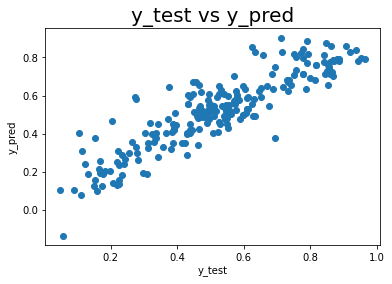

In [73]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test')
plt.ylabel('y_pred')      

In [74]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true=y_test, y_pred=y_pred)
r2

0.7950820520880222

## SUMMARY

#### Final Model Parameters on Train Dataset:

R-square value:                       0.823 <br>
Adj. R-square value:                  0.820
    
#### Final Model Parameters on Test Dataset:

R-square value:                       0.795

### The equation of our best fitted line is:

<br>

$ cnt = 0.1222 + 0.5757  \times  atemp + 0.2340 \times yr + 0.1207 \times winter + 0.1023 \times september + 0.0822 \times summer - 0.0789 \times misty - 0.0960 \times holiday - 0.1356 \times windspeed - 0.2769 \times light rain $

### Insights to the Company:
<br>


1. Which variables are significant in predicting the demand for shared bikes?

- A: The variables - atemp, yr, season_winter, mnth_september, season_summer, weathersit_misty, holiday, windspeed, and weathersit_light_rain are significant in predicting the demand for shared bikes

2. How well those variables describe the bike demands?

- A: The variables are able to describe approximately 80% of the bike demands.